

```
#EWMA Models : Exponentially Weighted Moving Average.
#SMA : Simple Moving Average : It is one of the most commonly used techniques to smooth out short-term fluctuations and to highlight longer-term trends or cycles.
# EWMA will allow us to reduce the lag effect from SMA & it will put more weight on values that occurred more recently (By applying more weights to the more recent values, thus the name).
```



In [100]:
#EWMA Models : Exponentially Weighted Moving Average.
#SMA : Simple Moving Average : It is one of the most commonly used techniques to smooth out short-term fluctuations and to highlight longer-term trends or cycles.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
df = pd.read_csv('/content/sample_data/airline_passengers.csv',index_col='Month')

In [103]:
df.dropna(inplace=True)

In [104]:
df.index = pd.to_datetime(df.index)

In [105]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [106]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [107]:
df['6-Month-SMA'] = df['Thousands of Passengers'].rolling(window=6).mean()
df['12-Month-SMA'] = df['Thousands of Passengers'].rolling(window=12).mean()

In [108]:
df.head()

,Thousands of Passengers,6-Month-SMA,12-Month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN


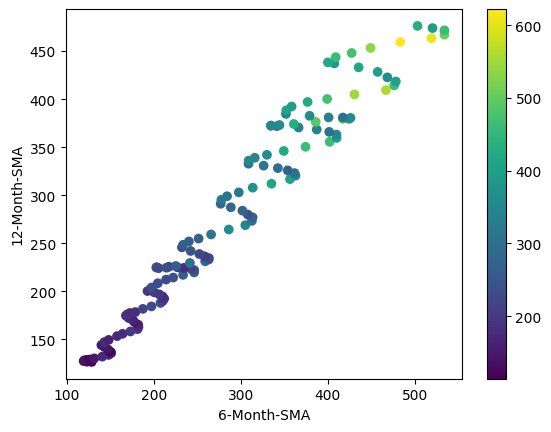

In [109]:
# @title Moving Averages vs. Passengers

import matplotlib.pyplot as plt
plt.scatter(df['6-Month-SMA'], df['12-Month-SMA'], c=df['Thousands of Passengers'])
plt.xlabel('6-Month-SMA')
plt.ylabel('12-Month-SMA')
_ = plt.colorbar()

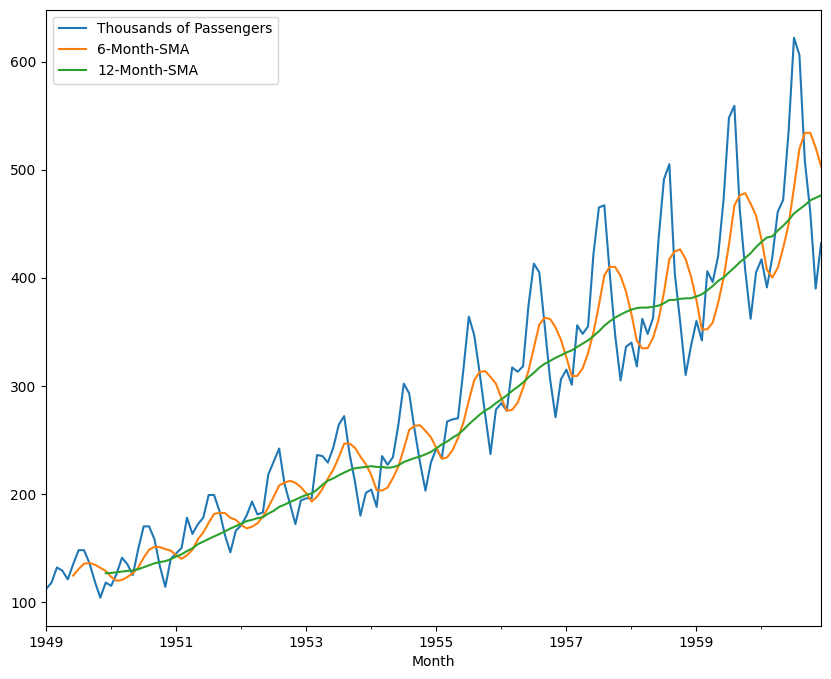

In [110]:
df.plot(figsize=(10,8));

In [111]:
df['EWMA-12'] =  df['Thousands of Passengers'].ewm(span=12).mean()

<Axes: xlabel='Month'>

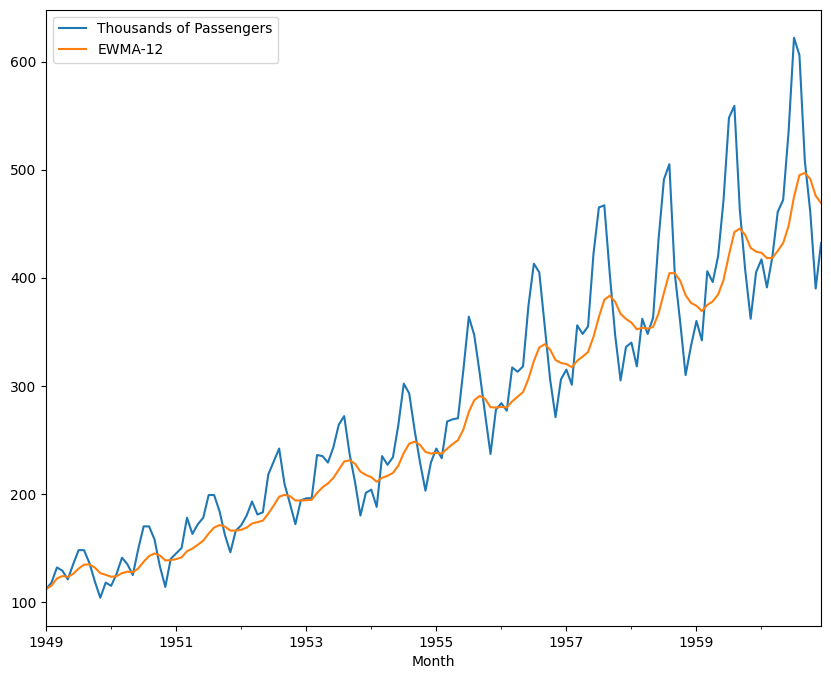

In [112]:
df[['Thousands of Passengers','EWMA-12']].plot(figsize=(10,8))

In [113]:
monthly_data = df.resample('M').sum()

In [114]:
monthly_data

,Thousands of Passengers,6-Month-SMA,12-Month-SMA,EWMA-12
Month,,,,
1949-01-31,112,0.000000,0.000000,112.000000
1949-02-28,118,0.000000,0.000000,115.250000
1949-03-31,132,0.000000,0.000000,121.787529
1949-04-30,129,0.000000,0.000000,124.064224
1949-05-31,121,0.000000,0.000000,123.231685
...,...,...,...,...
1960-08-31,606,519.166667,463.333333,494.898620
1960-09-30,508,534.000000,467.083333,496.914217
1960-10-31,461,534.000000,471.583333,491.388952


In [115]:
yearly_data = df.resample('A').sum()

In [116]:
yearly_data

,Thousands of Passengers,6-Month-SMA,12-Month-SMA,EWMA-12
Month,,,,
1949-12-31,1520,921.666667,126.666667,1506.499086
1950-12-31,1676,1633.000000,1587.666667,1605.872954
1951-12-31,2042,1971.000000,1878.083333,1893.004374
1952-12-31,2364,2293.333333,2207.833333,2211.096661
1953-12-31,2700,2664.500000,2571.000000,2569.972702
1954-12-31,2867,2808.500000,2755.166667,2758.416694
1955-12-31,3408,3295.333333,3150.333333,3174.018484
1956-12-31,3939,3853.000000,3710.416667,3712.084374
1957-12-31,4421,4326.166667,4190.000000,4197.022787


In [117]:
quarter_day = df.resample('Q').sum()

In [118]:
quarter_day

,Thousands of Passengers,6-Month-SMA,12-Month-SMA,EWMA-12
Month,,,,
1949-03-31,362,0.000000,0.000000,349.037529
1949-06-30,385,124.500000,0.000000,373.387914
1949-09-30,432,402.166667,0.000000,400.335775
1949-12-31,341,395.000000,126.666667,383.737867
1950-03-31,382,363.500000,382.833333,373.991565
1950-06-30,409,381.666667,388.333333,386.733861
1950-09-30,498,440.500000,402.000000,424.803447
1950-12-31,387,447.333333,414.500000,420.344081
1951-03-31,473,426.666667,433.583333,428.077784


In [119]:
buisness_year = df.resample('BQ-DEC').sum()

In [120]:
buisness_year

,Thousands of Passengers,6-Month-SMA,12-Month-SMA,EWMA-12
Month,,,,
1949-03-31,362,0.000000,0.000000,349.037529
1949-06-30,385,124.500000,0.000000,373.387914
1949-09-30,432,402.166667,0.000000,400.335775
1949-12-30,341,395.000000,126.666667,383.737867
1950-03-31,382,363.500000,382.833333,373.991565
1950-06-30,409,381.666667,388.333333,386.733861
1950-09-29,498,440.500000,402.000000,424.803447
1950-12-29,387,447.333333,414.500000,420.344081
1951-03-30,473,426.666667,433.583333,428.077784


In [121]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [122]:
df.index.freq = 'MS'

In [123]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [124]:
df.head()

,Thousands of Passengers,6-Month-SMA,12-Month-SMA,EWMA-12
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,115.250000
1949-03-01,132,NaN,NaN,121.787529
1949-04-01,129,NaN,NaN,124.064224
1949-05-01,121,NaN,NaN,123.231685


In [125]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span= 12
alpha = 2/(span+1)

In [126]:
df['EWMA12 (alpha)'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df.head()

,Thousands of Passengers,6-Month-SMA,12-Month-SMA,EWMA-12,EWMA12 (alpha)
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,115.250000,112.923077
1949-03-01,132,NaN,NaN,121.787529,115.857988
1949-04-01,129,NaN,NaN,124.064224,117.879836
1949-05-01,121,NaN,NaN,123.231685,118.359861


In [127]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])
fitted_model= model.fit(smoothing_level=alpha, optimized=False) #smoothing level = alpha
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [128]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [129]:
df.head()

,Thousands of Passengers,6-Month-SMA,12-Month-SMA,EWMA-12,EWMA12 (alpha),SES12
Month,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,112.000000
1949-02-01,118,NaN,NaN,115.250000,112.923077,112.923077
1949-03-01,132,NaN,NaN,121.787529,115.857988,115.857988
1949-04-01,129,NaN,NaN,124.064224,117.879836,117.879836
1949-05-01,121,NaN,NaN,123.231685,118.359861,118.359861


In [130]:
from statsmodels.tsa.holtwinters import  ExponentialSmoothing

In [131]:
df['Double_Expo_sm_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,6-Month-SMA,12-Month-SMA,EWMA-12,EWMA12 (alpha),SES12,Double_Expo_sm_add_12
Month,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,112.000000,114.102394
1949-02-01,118,NaN,NaN,115.250000,112.923077,112.923077,120.040657
1949-03-01,132,NaN,NaN,121.787529,115.857988,115.857988,134.001539
1949-04-01,129,NaN,NaN,124.064224,117.879836,117.879836,131.085845
1949-05-01,121,NaN,NaN,123.231685,118.359861,118.359861,123.110263


In [132]:
df.columns

Index(['Thousands of Passengers', '6-Month-SMA', '12-Month-SMA', 'EWMA-12',
       'EWMA12 (alpha)', 'SES12', 'Double_Expo_sm_add_12'],
      dtype='object')

<Axes: xlabel='Month'>

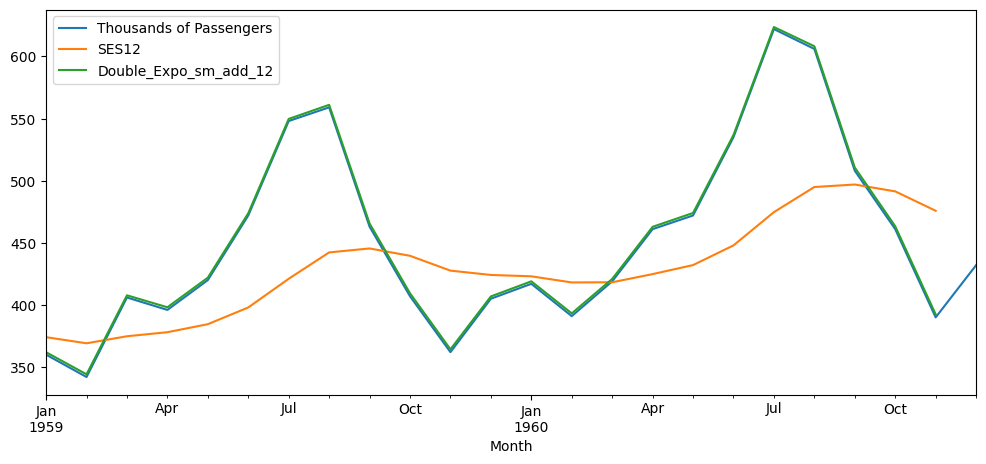

In [133]:
df[['Thousands of Passengers', 'SES12', 'Double_Expo_sm_add_12']].iloc[-24:].plot(figsize=(12,5))

In [134]:
df['Double_Expo_sm_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,6-Month-SMA,12-Month-SMA,EWMA-12,EWMA12 (alpha),SES12,Double_Expo_sm_add_12,Double_Expo_sm_mul_12
Month,,,,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,NaN,NaN,115.250000,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,NaN,NaN,121.787529,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,NaN,NaN,124.064224,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,NaN,NaN,123.231685,118.359861,118.359861,123.110263,123.156267


<Axes: xlabel='Month'>

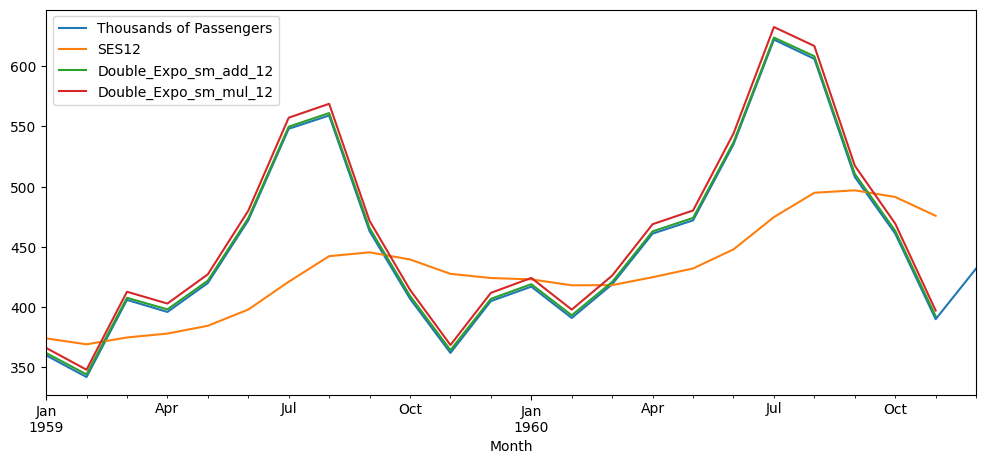

In [135]:
df[['Thousands of Passengers', 'SES12', 'Double_Expo_sm_add_12','Double_Expo_sm_mul_12']].iloc[-24:].plot(figsize=(12,5))

<Axes: xlabel='Month'>

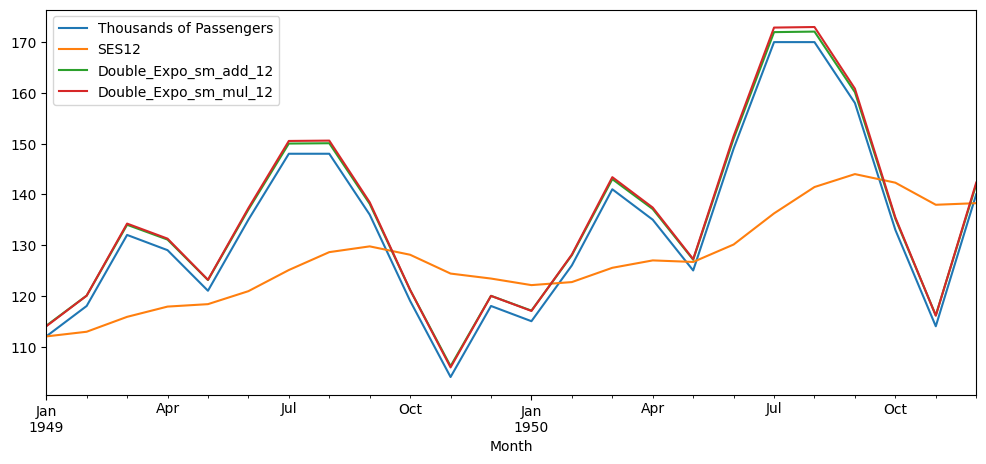

In [136]:
df[['Thousands of Passengers', 'SES12', 'Double_Expo_sm_add_12','Double_Expo_sm_mul_12']].iloc[:24].plot(figsize=(12,5))

In [137]:
#TRIPLE Exponential Smoothing

df['Triple_mul_12'] =  ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

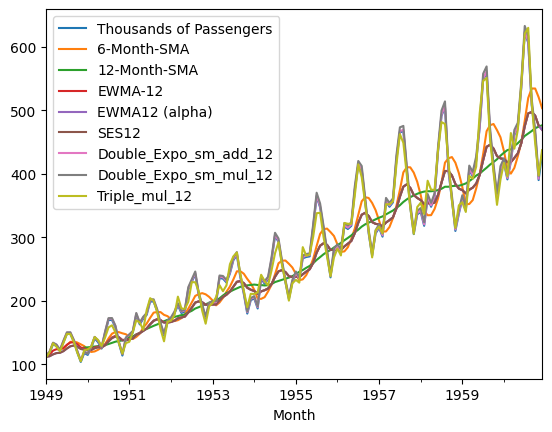

In [138]:
df.plot()

<Axes: xlabel='Month'>

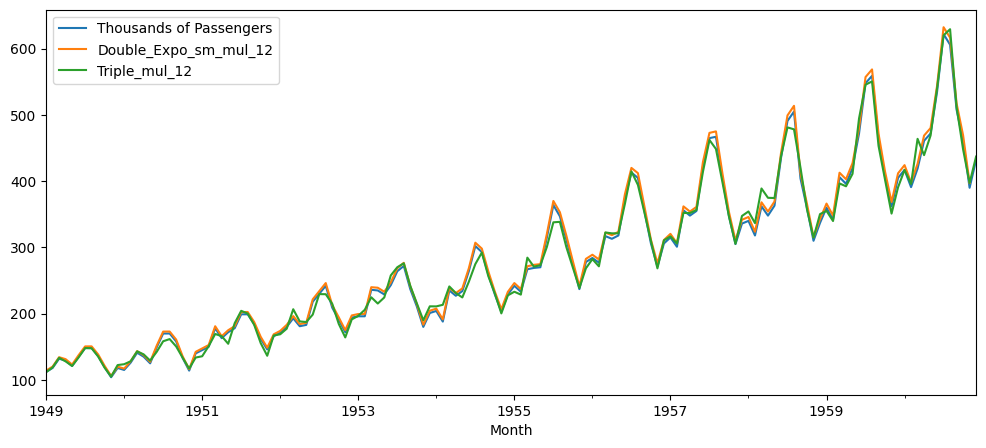

In [139]:
df[['Thousands of Passengers','Double_Expo_sm_mul_12','Triple_mul_12']].plot(figsize=(12,5))

<Axes: xlabel='Month'>

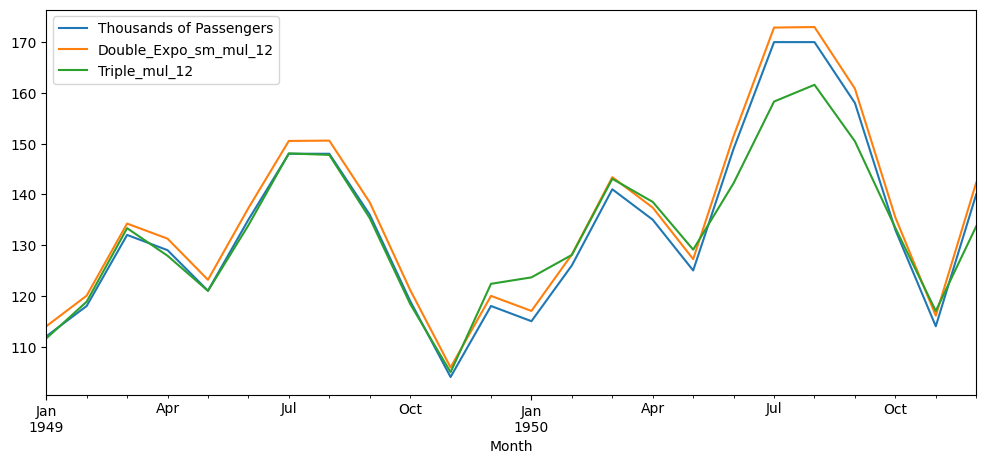

In [140]:
df[['Thousands of Passengers','Double_Expo_sm_mul_12','Triple_mul_12']].iloc[:24].plot(figsize=(12,5))

<Axes: xlabel='Month'>

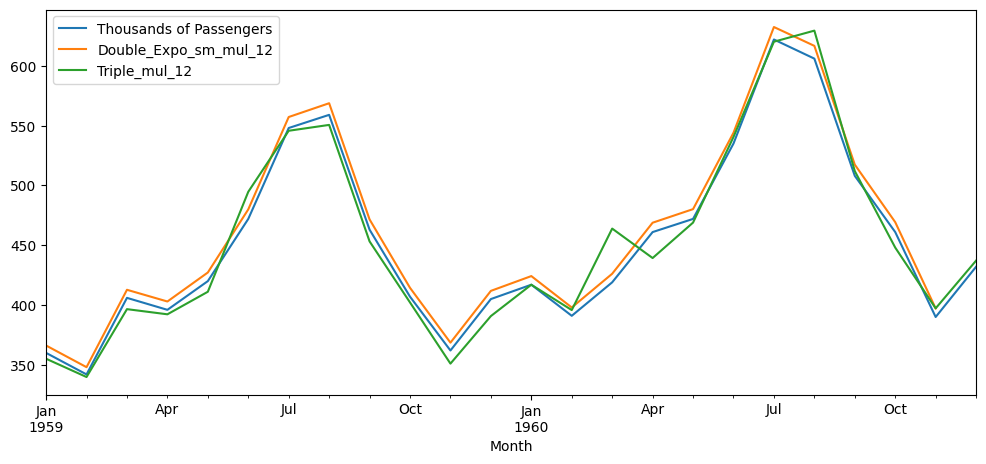

In [141]:
df[['Thousands of Passengers','Double_Expo_sm_mul_12','Triple_mul_12']].iloc[-24:].plot(figsize=(12,5))

In [142]:
from bs4 import BeautifulSoup
import requests

In [143]:
# URL of the website you want to scrape
url = 'https://en.wikipedia.org/wiki/Warren_Buffett'

# Send a GET request to the website
response = requests.get(url)

In [144]:
# Parse the HTML content of the website
soup = BeautifulSoup(response.content, 'html.parser')

# Find the first <p> tag on the page (assuming it contains the paragraph you want)
paragraph = soup.find('p')

# Print the text content of the paragraph
if paragraph:
    print(paragraph.text)
else:
    print("Paragraph not found on the webpage.")

In [145]:
from bs4 import BeautifulSoup
import requests

# URL of the webpage containing information about Warren Buffett
url = 'https://en.wikipedia.org/wiki/Warren_Buffett'

# Send a GET request to the website
response = requests.get(url)

# Parse the HTML content of the website
soup = BeautifulSoup(response.content, 'html.parser')

# Find the section containing early life and education
section = soup.find('span', {'id': 'Early_life_and_education'})

# If the section is found, print the text content
if section:
    # Find the following <p> tag containing the text
    paragraph = section.find_next('p')
    if paragraph:
        print(paragraph.text)
    else:
        print("No paragraph found in the section.")
else:
    print("Early life and education section not found on the webpage.")


Warren Edward Buffett was born on August 30, 1930 in Omaha, Nebraska, as the second of three children and the only son of Leila (née Stahl) and Congressman Howard Buffett.[11] He began his education at Rose Hill Elementary School. In 1942, his father was elected to the first of four terms in the United States Congress, and after moving with his family to Washington, D.C., Warren finished elementary school, attended Alice Deal Junior High School and graduated from what was then Woodrow Wilson High School in 1947, where his senior yearbook picture reads: "likes math; a future stockbroker".[12] After finishing high school and finding success with his side entrepreneurial and investment ventures, Buffett wanted to skip college to go directly into business but was overruled by his father.[13][14]

